<h1><center>CS 464</center></h1>
<h1><center>Introduction Machine Learning</center></h1>
<h1><center>Spring 2019</center></h1>
<h1><center>Homework 3</center></h1>

<h3><center>Due: May 21, 2019 23:59</center></h3>

## Instructions

<ul>
    <li>This homework contains both written and programming questions about neural networks. You should implement your programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells. You should upload this .ipynb file with the computed output cells for each code cell.
    </li>
    <li>
        For questions that you need to plot, your plot results have to be included in cell output.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use different libraries than given libraries which are defined in the required packages section.
    </li>
    <li>
        It is <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
        In this homework, you have to implement programming questions on <b>Python 3</b> version programming language.
    </li>
    <li>
        While submitting the homework file, please package your notebook(".ipynb") files as a gzipped TAR file or a ZIP file with the name CS464_HW3_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and report file. Upload your homework to Moodle.
    </li>
    <li>
        Any violation of these rules may lead to significant grade deduction.
    </li>
    <li>
        if your code cell does not return outputs correctly, you will lose points for the corresponding question.
    </li>
    <li> You can send an email for your questions to <b>can.uner@bilkent.edu.tr</b> address.</li>
    <li> You can use Google Colab or your own local environment for this homework. You can prefer Google Colab since you have access to GPUs. You do not have to use GPUs to complete this homework though. If you prefer to use your local system, you should follow the below "Environmental Setup" instructions.</li>
</ul>

## Environment Setup

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries create "requirements.txt" file which contains given required packages and run following command in the activated "hw3" environment<br>
        <i>> pip install -r requirements.txt<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>

### Pytorch Installation

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

If your system has appropriate GPU Driver, CUDA and CuDNN installations, then you can use GPU supported PyTorch as well.

### Required Packages

Additional required packages except PyTorch and Torchvision are defined below.

In [ ]:
numpy
pandas
Pillow
matplotlib
scikit-image
scipy

## Question 1 - 35 pts

In this question, you are going to implement a Convolutional Neural Network (CNN) to solve the indoor scene recognition problem. The provided subset of [MIT Indoor67 dataset](http://web.mit.edu/torralba/www/indoor.html) contains images of 10 indoor categories which are <i>bakery, toyshop, dining room, bathroom, library, pool inside, gym, bowling, computer room, hospital room.</i>

In this question, you are going to compare transfer learning and from scratch training approaches.

### Q1.a. Data Loader - 10 pts

We provide you a subset of MIT Indoor dataset. Download our version of MIT Indoor10 dataset from Moodle. You have to implement a custom data loader for the indoor dataset. You can visit [link](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to implement such a data loader. There will be a comparison of training approaches in this question. <b>Both approaches have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Give details about data loading and augmentation steps. How many training, test and validation samples do exist for each class? Do you need to apply augmentations for training, test, and validation sets? Why or why not?

In [8]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils, models
import torchvision.datasets as dset
from torch import nn
from torch import optim
import torch.nn.functional as F
torch.set_default_tensor_type(torch.cuda.FloatTensor)



import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")


In [9]:
transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = dset.ImageFolder(root='indoor_data',
                                           transform=transformations)

In [10]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
temp, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_size = int(0.875* len(temp))
valid_size = len(temp) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(temp, [train_size, valid_size])
print ("Train size:", len(train_dataset))
print ("Test size:", len(test_dataset))
print ("Validation size:", len(valid_dataset))

trainloader  = torch.utils.data.DataLoader(train_dataset,
                                     batch_size=4, shuffle=True,
                                     num_workers=2)
validationloader  = torch.utils.data.DataLoader(valid_dataset,
                                     batch_size=4, shuffle=False,
                                     num_workers=2)
testloader  = torch.utils.data.DataLoader(test_dataset,
                                     batch_size=4, shuffle=False,
                                     num_workers=2)

Train size: 1513
Test size: 433
Validation size: 217


<b>Answer for Q1.a.3: </b> 
<font color=black>I resized the images since every image has different pixel count and I make the interpolation 2. Above you can find the size of the each class and I used random split provided by Pytorch. The split ratios are the same with the question. I also used 
dataloader for my each class.
</font>

### Q1.b. Convolutional Neural Network (CNN) - 5 pts

The torchvision package contains of popular datasets, model architectures, and common image transformations for computer vision. In this question, you are going to use one of the well known CNN models which already exist in torchvision. Visit [link](https://pytorch.org/docs/stable/torchvision/models.html) to explore models in torchvision. Remember that using deeper or wider networks may increase your training time.
1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class. This class should have a network that you select among torchvision models as an instance member.
2. <font color=blue>\[Written\]</font> State the model you selected and explain why you picked that model. Did you need to modify any part of this model to adopt to your task? 

In [11]:
# USE THIS CODE CELL TO DEFINE CNN CLASS
import torchvision.models as models
import torch
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
model = models.alexnet()
model.to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 61 * 61, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 61 * 61)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=59536, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

<b>Answer Q1.b.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

<font color=blue>Double click to this text to write your answer !!!</font>

### Q1.c. Transfer Learning vs Training from Scratch - 13 pts

In this question, are going to compare two different learning approaches: Transfer learning and Learning from scratch. Thanks to using the already implemented CNN model from torchvision, you can easily convert your randomly initialized network to a pretrained network. Do not forget that you are going to solve a multiclass classification problem. According to that, you need to carefully select the appropriate loss function. You need to select appropriate values for hyper-parameters. You need to use SGD optimizer for this question. Use the training, validation and test splits you created Q1.a. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both strategies. You have to print out average values of training loss, training accuracy, validation loss and validation accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the from-scratch-trained model, plot training loss and training accuracy of each iteration (update). Also plot validation loss and accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the transfer learning applied model, plot training loss and training accuracy of each iteration (each update). Also plot validation loss and accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to the validation results, pick the best models for both training approaches. You are going to use these models at the test phase. You need to save them in ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> What are the differences between transfer learning and from scratch learning.
7. <font color=blue>\[Written\]</font> Explain how you selected hyperparameters for both strategies. Did you need to make any hyperparameter changes? 

In [13]:
# USE THIS CODE CELL TO SPECIFY YOUR BEST MODEL PATHS THAT WILL BE USED TO SAVE MODELS.

FROM_SCRATCH_MODEL_PATH = '' # change the value of FROM_SCRATCH_MODEL_PATH variable as your path
TRANSFER_LEARNING_MODEL_PATH = '' # change the value of TRANSFER_LEARNING_MODEL_PATH variable as your path

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [23]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

# --- Representative Code Snippet ---

def train(model, trainloader):
    train_run_loss = []
    train_av_loss = []
    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs = inputs.cuda()
            labels = labels.cuda()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            train_run_loss.append(loss.item())
            running_loss += loss.item()
            if i % 50 == 49:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / i))
        train_av_loss.append(running_loss / 378)
        print("Average: ", running_loss / 378) #Average training loss
                
    print('Finished Training')
    return train_run_loss, train_av_loss

def evaluation(model, testloader):
    correct = 0
    total = 0
    train_ac = []
    train_ac_av = []
    false_pos = 0
    true_neg = 0
    for epoch in range(2):  # loop over the dataset multiple times
            #correct = 0
            #total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.cuda()
                    labels = labels.cuda()
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    false_pos += (predicted < labels).sum().item()
                    true_neg += (predicted > labels).sum().item()
                    train_ac.append(correct/total)
                print("Average accuracy: ", correct / total)
                train_ac_av.append(correct/total)
    print('Accuracy of the network on the 10000 test images: %.3f %%' % (100 * correct / total))
    return train_ac, train_ac_av, false_pos, true_neg, correct

In [21]:
# RUN TRAIN FUNCTION FOR THE FROM SCRATCH APPROACH IN THIS CELL.
# PRINT OUT REQUIRED METRICS FOR EACH EPOCH.
# EVALUATE YOUR MODEL AND SAVE THE BEST MODEL ACCORDING TO VALIDATION METRICS.

train_run_loss, train_av_loss = train(model, trainloader)
train_ac, train_ac_av, false_pos, true_neg, correct = evaluation(model, trainloader)
train_ac_va, train_ac_av_va, false_pos, true_neg, correct = evaluation(model, validationloader)

[1,    50] loss: 2.303
[1,   100] loss: 2.278
[1,   150] loss: 2.297
[1,   200] loss: 2.309
[1,   250] loss: 2.306
[1,   300] loss: 2.299
[1,   350] loss: 2.287
Average:  2.2846837813261325
[2,    50] loss: 2.365
[2,   100] loss: 2.351
[2,   150] loss: 2.306
[2,   200] loss: 2.291
[2,   250] loss: 2.300
[2,   300] loss: 2.282
[2,   350] loss: 2.284
Average:  2.284340424197061
Finished Training
Average accuracy:  0.18638466622604097
Average accuracy:  0.1844018506278916
Accuracy of the network on the 10000 test images: 18.440 %


ValueError: not enough values to unpack (expected 5, got 4)

In [12]:
valid_run_loss, valid_av_loss = train(model, validationloader)
valid_ac, valid_ac_av, false_pos, true_neg, correct = evaluation(model, trainloader)
valid_ac_va, valid_ac_av_va, false_pos, true_neg, correct = evaluation(model, validationloader)

[1,    50] loss: 2.253
Average:  0.3218527634938558
[2,    50] loss: 2.220
Average:  0.3169990680205128
Finished Training
Average accuracy:  0.18638466622604097
Accuracy of the network on the 10000 test images: 18.638 %
Average accuracy:  0.2350230414746544
Accuracy of the network on the 10000 test images: 23.502 %


In [39]:
# USE THIS CODE CELL TO PLOT METRICS FOR THE TRANSFER LEARNING [Answer: Q1.c.3]

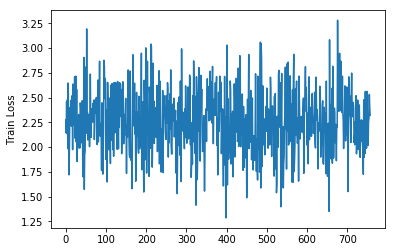

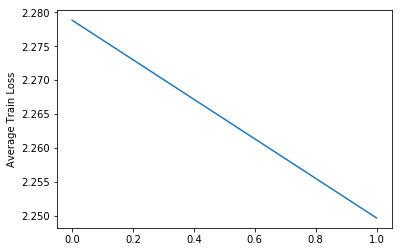

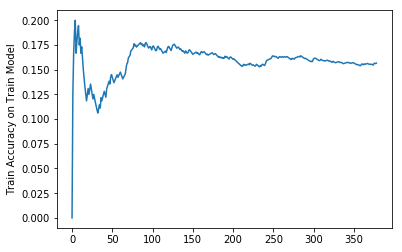

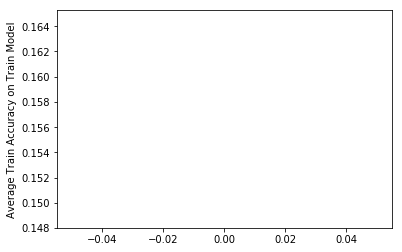

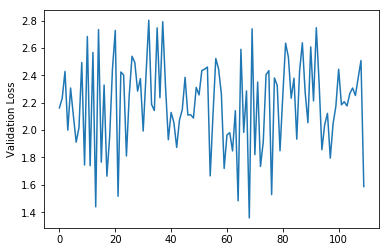

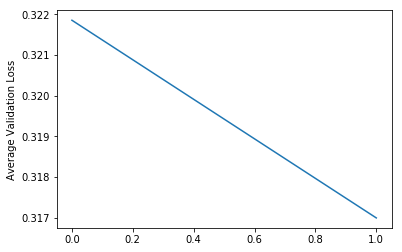

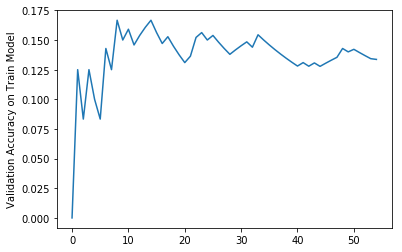

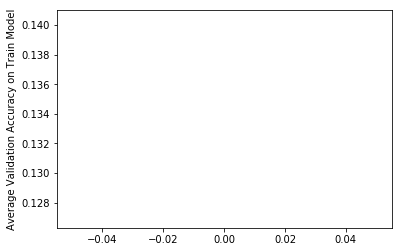

In [16]:
plt.plot(train_run_loss)
plt.ylabel('Train Loss')
plt.show()
plt.plot(train_av_loss)
plt.ylabel('Average Train Loss')
plt.show()
plt.plot(train_ac)
plt.ylabel('Train Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av)
plt.ylabel('Average Train Accuracy on Train Model')
plt.show()
plt.plot(valid_run_loss)
plt.ylabel('Validation Loss')
plt.show()
plt.plot(valid_av_loss)
plt.ylabel('Average Validation Loss')
plt.show()
plt.plot(train_ac_va)
plt.ylabel('Validation Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av_va)
plt.ylabel('Average Validation Accuracy on Train Model')
plt.show()

In [24]:
train_run_loss, train_av_loss = train(net, trainloader)
train_ac, train_ac_av, false_pos, true_neg, correct = evaluation(net, trainloader)
train_ac_va, train_ac_av_va, false_pos, true_neg, correct = evaluation(net, validationloader)

[1,    50] loss: 2.346
[1,   100] loss: 2.319
[1,   150] loss: 2.310
[1,   200] loss: 2.307
[1,   250] loss: 2.304
[1,   300] loss: 2.302
[1,   350] loss: 2.300
Average:  2.300919705597812
[2,    50] loss: 2.341
[2,   100] loss: 2.319
[2,   150] loss: 2.312
[2,   200] loss: 2.308
[2,   250] loss: 2.305
[2,   300] loss: 2.303
[2,   350] loss: 2.301
Average:  2.3007381265125577
Finished Training
Average accuracy:  0.1844018506278916
Average accuracy:  0.1844018506278916
Accuracy of the network on the 10000 test images: 18.440 %
Average accuracy:  0.1889400921658986
Average accuracy:  0.1889400921658986
Accuracy of the network on the 10000 test images: 18.894 %


In [ ]:
valid_run_loss, valid_av_loss = train(net, validationloader)
valid_ac, valid_ac_av, false = evaluation(net, trainloader)
valid_ac_va, valid_ac_av_va, false = evaluation(net, validationloader)

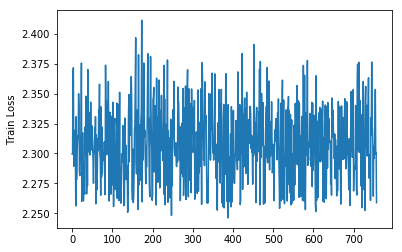

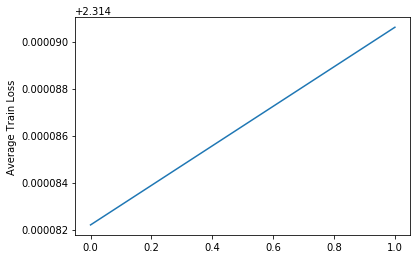

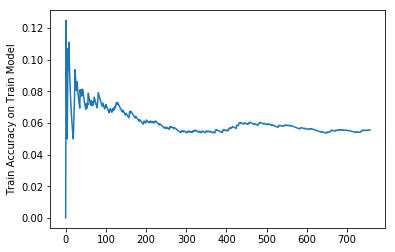

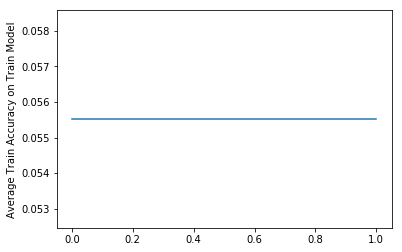

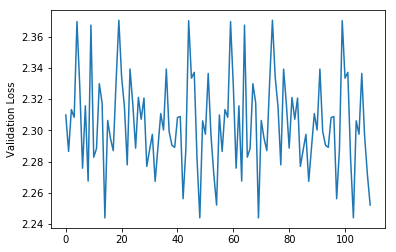

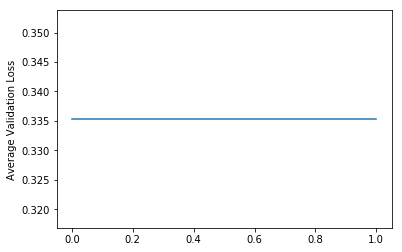

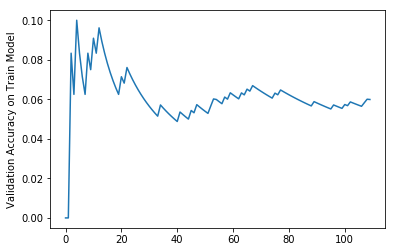

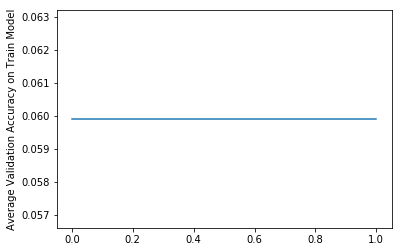

In [28]:
plt.plot(train_run_loss)
plt.ylabel('Train Loss')
plt.show()
plt.plot(train_av_loss)
plt.ylabel('Average Train Loss')
plt.show()
plt.plot(train_ac)
plt.ylabel('Train Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av)
plt.ylabel('Average Train Accuracy on Train Model')
plt.show()
plt.plot(valid_run_loss)
plt.ylabel('Validation Loss')
plt.show()
plt.plot(valid_av_loss)
plt.ylabel('Average Validation Loss')
plt.show()
plt.plot(train_ac_va)
plt.ylabel('Validation Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av_va)
plt.ylabel('Average Validation Accuracy on Train Model')
plt.show()

In [41]:
import os
hop = os.getcwd()
hop2 = hop
hop = hop + '\model.pth'
hop2 = hop2 + '\\net.pth'
torch.save(model, hop)
torch.save(net,  hop2)

C:\Users\pc\Desktop\HW3
C:\Users\pc\Desktop\HW3\net.pth


<b>Answer for Q1.c.5:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I choose Cross-Entropy loss function since I thought it was the most optimal loss function for my models considering the function is similar to my train loss function.

<b>Answer for Q1.c.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

In transfer learning, there is a model that is ready model and we just use it. We cannot change it but we can add some layers at the end of it because of our output features. In scratch learning, I choose my layers, I ordered my layers and I optimized my layers, so I do not inherit anything. 

<b>Answer for Q1.c.7:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I changed my batch size several times to see if I get better results. I also changed my linear layer's size, I tried to change my pool size in max pooling but I got an error. 

### Q1.d. Test Classifiers - 7 pts

You should have obtained two trained networks so far. One of them comes from a transfer learning approach and the other network is from from-scratch-trained approach. In this case, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained with the transfer learning approach. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the model that trained from scratch. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [1.] question.
4. <font color=blue>\[Figure\]</font> Provide confusion matrix for the results of [2.] question.
5. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
6. <font color=blue>\[Written\]</font> Give the test set accuracy values for these two models. Which training approach does work better than the other? Explain why?

In [42]:
model = torch.load(hop)
net = torch.load(hop2)

In [31]:
valid_ac_va, valid_ac_av_va, false_pos, true_neg, correct= evaluation(model, testloader)
print("False Negatives: ", false_pos/2) #Since there are 2 epochs
print("True Positives: ", true_neg/2)
print("True Positives and False Negatives: ", correct/2)

Average accuracy:  0.08083140877598152
Average accuracy:  0.08083140877598152
Accuracy of the network on the 10000 test images: 8.083 %
False Negatives:  144.0
True Positives:  254.0
True Positives and False Negatives:  35.0


In [30]:
valid_ac_va, valid_ac_av_va, false, true, correct = evaluation(net, testloader)
print("False Negatives: ", false_pos/2) #Since there are 2 epochs
print("True Positives: ", true_neg/2)
print("True Positives and False Negatives: ", correct/2)

Average accuracy:  0.18937644341801385
Average accuracy:  0.18937644341801385
Accuracy of the network on the 10000 test images: 18.938 %
False Negatives:  144.0
True Positives:  254.0
True Positives and False Negatives:  82.0


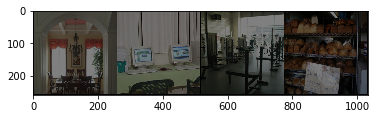

dining_room computerroom   gym bakery
Predicted:  bakery bakery bakery bakery


In [62]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('bakery', 'bathroom', 'bowling', 'computerroom',
           'dining_room', 'gym', 'hospitalroom', 'library', 'poolinside', 'toystore')
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

images = images.cuda()
labels = labels.cuda()
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

## Question 2 - 65 pts

In this question, you are going to implement both a Convolutional Neural Network (CNN) architecture and a Multilayer Perceptron (MLP) to solve the bird type classification problem. As the dataset, you will use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. The dataset consists of 11.788 photos of 200 bird species. The dataset provides you bounding boxes, image labels, and training-test splits. DO NOT FORGET THAT YOU WILL NOT USE TRAINING-TEST SPLIT WHICH IS PROVIDED BY DATASET. YOU WILL SPLIT THE DATASET INTO TRAINING, TEST AND VALIDATION SETS YOURSELF.

You are free to choose your neural network architecture in this question but there will be a minimum performance threshold and your network's performance will affect your grade for this question. The thresholds and metric types are specified in corresponding questions.

<b>Note: You should be able to achieve these goals with training time < a day on a GPU.</b>

### Q2.a. Data Loader - 15 pts

In this question you are going to use [Caltech-UCSD Birds-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html) dataset. Download the dataset from given [link](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html). You have to implement a custom data loader. Notice that photos are not tightly cropped. You may choose to crop images by using bounding boxes which exist in the dataset. Note that you will build CNN and MLP architectures and input types should be different for these networks. You should prepare data loaders by considering this situation. You may need to convert images to grayscale format to train the MLP model. <b>MLP and CNN architectures have to use exactly the same splits (training, test, and validation) to make their performance results comparable.</b>

1. <font color=blue>\[Code\]</font> Split the dataset as training, test, and validation sets. For each class, 20% of its samples should be in test set and 10% of its samples should be in the validation set. 
2. <font color=blue>\[Code\]</font> Apply appropriate augmentations to the set(s) for which it is essential.
3. <font color=blue>\[Written\]</font> Explain your augmentation method differences for two models? 



In [3]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, utils, models
import torchvision.datasets as dset
from torch import nn
from torch import optim
import torch.nn.functional as F
torch.set_default_tensor_type(torch.cuda.FloatTensor)


import warnings
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

In [4]:
transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = dset.ImageFolder(root='CUB_200_2011\images',
                                           transform=transformations)

transformationsM = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Resize((256, 256)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

datasetM = dset.ImageFolder(root='CUB_200_2011\images',
                                           transform=transformations)

In [5]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
temp, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_size = int(0.875* len(temp))
valid_size = len(temp) - train_size
train_dataset, valid_dataset = torch.utils.data.random_split(temp, [train_size, valid_size])
print ("Train size:", len(dataset))
print ("Train size:", len(train_dataset))
print ("Test size:", len(test_dataset))
print ("Validation size:", len(valid_dataset))

trainloader  = torch.utils.data.DataLoader(train_dataset,
                                     batch_size=64, shuffle=True,
                                     num_workers=2)
validationloader  = torch.utils.data.DataLoader(valid_dataset,
                                     batch_size=64, shuffle=False,
                                     num_workers=2)
testloader  = torch.utils.data.DataLoader(test_dataset,
                                     batch_size=64, shuffle=False,
                                     num_workers=2)

Train size: 11788
Train size: 8251
Test size: 2358
Validation size: 1179


In [6]:
train_sizeM = int(0.8 * len(datasetM))
test_sizeM = len(datasetM) - train_sizeM
tempM, test_datasetM = torch.utils.data.random_split(datasetM, [train_sizeM, test_sizeM])

train_sizeM = int(0.875* len(tempM))
valid_sizeM = len(tempM) - train_sizeM
train_datasetM, valid_datasetM = torch.utils.data.random_split(tempM, [train_sizeM, valid_sizeM])
print ("Train size:", len(datasetM))
print ("Train size:", len(train_datasetM))
print ("Test size:", len(test_datasetM))
print ("Validation size:", len(valid_datasetM))

trainloaderM  = torch.utils.data.DataLoader(train_datasetM,
                                     batch_size=128, shuffle=True,
                                     num_workers=2)
validationloaderM  = torch.utils.data.DataLoader(valid_datasetM,
                                     batch_size=128, shuffle=False,
                                     num_workers=2)
testloaderM  = torch.utils.data.DataLoader(test_datasetM,
                                     batch_size=128, shuffle=False,
                                     num_workers=2)

Train size: 11788
Train size: 8251
Test size: 2358
Validation size: 1179


<b>Answer for Q2.a.3: </b> 

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

For the CNN model, I just resized them and convert them to tensort, for the MLP model, I converted them to grayscale with channels 1, resized them, normalized them and convert them to tensors.

### Q2.b. Multilayer Perceptron - 5 pts

Implement the MLP model to solve this multiclass classification problem. For the MLP model, <b>accuracy for the top-5 classes on the test set has to be minimum 20%</b>. You have to design your network according to this limitation. 

1. <font color=blue>\[Code\]</font> Write your own MLP class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How many neurons are there in each layer? Did you use any activation functions? 

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch

class MNet(nn.Module):
    def __init__(self):
        super(MNet, self).__init__()
        self.fc1 = nn.Linear(3*256*256, 1024)
        #self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(1024, 200)
    def forward(self, x):
        x = x.view(-1, 3*256*256)
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

mnet = MNet()
mnet.to(device)


MNet(
  (fc1): Linear(in_features=196608, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=200, bias=True)
)

<b>Answer Q2.b.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I have 2 linear layers. According to my research, I cannot use any layer except linear for MLP. At first, I tried to use 3 layers, but later it slowned my model so much and I decreased it to 2. I used relu activition function for my first layer. For the neurons, at first I have 3*256*256 features so I have that many input. But later I decreased it to 1024 and then 200 which is my class size.

### Q2.c. Convolutional Neural Network (CNN) - 8 pts

Implement the CNN model to solve this multiclass classification problem. For the CNN model, <b>accuracy fot the top-5 classes on the test set has to be minimum 75%</b>. You have to design your network according to that limitation. 

1. <font color=blue>\[Code\]</font> Write your own CNN class which is inherited from torch.nn.Module class.
2. <font color=blue>\[Written\]</font> How many layers are there in your network? How did you choose the number of layers? How did you choose kernel sizes for each convolutional layer? Did you use any activation functions? 

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(16 * 61 * 61, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 200)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.dropout(x,training = self.training)
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 61 * 61)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
'''
net = models.alexnet()
print(net)
net.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 200),
                           nn.LogSoftmax(dim=1))
                           
#net = Net()

net.to(device)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

<b>Anser for Q2.c.2:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I have 2 convolution and 3 layers. Actually, I could not understand how to choose kernel size because it gave many errors when I tried to change the numbers, so I just used the neural network that I used in my previous question. I used relu activition function since it is the most popular activision function. I also changed my input size because the number of features was different in this question.

### Q2.d. Train MLP & CNN Networks - 13 pts

You are going to train MLP and CNN networks by using same training, validation and test samples. You have to solve a multiclass classification problem and you need to carefully select the appropriate loss function. You have minimum performance thresholds for both models. You need to select appropriate values for hyper-parameters to achieve these thresholds. You need to use SGD optimizer for this question. So far, you should have created three dataset splits for training, validation and testing. You will need to load these splits at this phase. Note that you will NOT perform cross validation. Evaluate your network performance after each epoch by using the validation set. Use matplotlib library for plotting figures.

1. <font color=blue>\[Code\]</font> Implement training and validation functions for both network architectures. You have to print out average values of training loss, training top-1 accuracy (accuracy of the most accurately predicted class), validation loss and validation top-1 accuracy for each epoch.
2. <font color=blue>\[Figure\]</font> For the MLP model, plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch. 
3. <font color=blue>\[Figure\]</font> For the CNN model,  plot training loss and training top-1 accuracy of each iteration (each update). Also plot validation loss and validation top-1 accuracy at each epoch.
4. <font color=blue>\[Code\]</font> Your models are going to run up to the max epoch parameter.  According to validation results pick the best models for both architectures. You are going to use these models at the test phase. You need to save them in a ".pth" files.
5. <font color=blue>\[Written\]</font> Which loss function did you use? Why did you choose it?
6. <font color=blue>\[Written\]</font> Explain how you selected the hyperparameters of the training phases for both MLP and CNN models.

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnet.parameters(), lr=0.01, momentum=0.90)

In [8]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

# --- Representative Code Snippet ---

def train(model, trainloader):
    train_run_loss = []
    train_av_loss = []
    for epoch in range(70):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs = inputs.cuda()
            labels = labels.cuda()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # print statistics
            train_run_loss.append(loss.item())
            running_loss += loss.item()
            print(i)
            if i % 50 == 49:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / i))
        train_av_loss.append(running_loss / 128)
        print("Average: ", running_loss / 128) #Average training loss
                
    print('Finished Training')
    return train_run_loss, train_av_loss

def evaluation(model, testloader):
    correct = 0
    total = 0
    train_ac = []
    train_ac_av = []
    false_pos = 0
    true_neg = 0
    for epoch in range(4):  # loop over the dataset multiple times
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.cuda()
                    labels = labels.cuda()
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    false_pos += (predicted < labels).sum().item()
                    true_neg += (predicted > labels).sum().item()
                    train_ac.append(correct/total)
                print("Average accuracy: ", 100*correct / total)
                train_ac_av.append(100*correct/total)
    print('Accuracy of the network on the 10000 test images: %.3f %%' % (100 * correct / total))
    return train_ac, train_ac_av, false_pos, true_neg, correct

In [ ]:
train_run_loss, train_av_loss = train(net, trainloader)

0
1
2
3
4
5
6
7
8
9
10
11


In [19]:
train_ac, train_ac_av, false_pos, true_neg, correct = evaluation(net, trainloader)
train_ac_va, train_ac_av_va, false_pos, true_neg, correct = evaluation(net, validationloader)

Hop
Average accuracy:  0.03125
Average accuracy:  0.03125
Average accuracy:  0.020833333333333332
Average accuracy:  0.015625
Average accuracy:  0.021875
Average accuracy:  0.0234375
Average accuracy:  0.024553571428571428
Average accuracy:  0.02734375
Average accuracy:  0.027777777777777776
Average accuracy:  0.025
Average accuracy:  0.022727272727272728
Average accuracy:  0.022135416666666668
Average accuracy:  0.026442307692307692
Average accuracy:  0.030133928571428572
Average accuracy:  0.03229166666666667
Average accuracy:  0.03125
Average accuracy:  0.029411764705882353
Average accuracy:  0.03125
Average accuracy:  0.029605263157894735
Average accuracy:  0.0296875
Average accuracy:  0.029017857142857144
Average accuracy:  0.028409090909090908
Average accuracy:  0.028532608695652172
Average accuracy:  0.027994791666666668
Average accuracy:  0.0275
Average accuracy:  0.027043269230769232
Average accuracy:  0.027199074074074073
Average accuracy:  0.02734375
Average accuracy:  0.026

Average accuracy:  0.03537954284444115
Average accuracy:  0.03536977491961415
Average accuracy:  0.035286309501862026
Average accuracy:  0.03531359205444179
Average accuracy:  0.03530404785496716
Average accuracy:  0.03529454838355362
Average accuracy:  0.0353581473499653
Average accuracy:  0.03538500783499143
Average accuracy:  0.0353753862934012
Average accuracy:  0.035365809423627985
Average accuracy:  0.035392465530344155
Average accuracy:  0.03552731342744701
Average accuracy:  0.035481430784193656
Average accuracy:  0.03550763701707098
Average accuracy:  0.03556957940406612
Average accuracy:  0.03563123814975137
Average accuracy:  0.03569261519791555
Average accuracy:  0.03568248993981696
Average accuracy:  0.03570794101971931
Average accuracy:  0.03573327661384664
Average accuracy:  0.03575849750645492
Average accuracy:  0.035783604474715035
Average accuracy:  0.03580859828879265
Average accuracy:  0.03579834884946426
Average accuracy:  0.03578814539591293
Average accuracy:  0.0

Average accuracy:  0.03422223884504619
Average accuracy:  0.03421868579326833
Average accuracy:  0.03428976530726465
Average accuracy:  0.034304773972347484
Average accuracy:  0.03428252372975991
Average accuracy:  0.03426032643045693
Average accuracy:  0.03423818188569943
Average accuracy:  0.03423463521382738
Average accuracy:  0.03421257363020042
Average accuracy:  0.034209065679925994
Average accuracy:  0.03424252503973094
Average accuracy:  0.034275905349034665
Average accuracy:  0.034309206887651635
Average accuracy:  0.034360844105623685
Average accuracy:  0.034412359757219055
Average accuracy:  0.03440864165778741
Average accuracy:  0.03444163088553708
Average accuracy:  0.034419559400315235
Average accuracy:  0.03441584593417054
Average accuracy:  0.03441214115926129
Average accuracy:  0.03440844504511086
Average accuracy:  0.03440475756138495
Average accuracy:  0.034401078677890745
Average accuracy:  0.03439740836457613
Average accuracy:  0.03441192510452645
Average accuracy:

Average accuracy:  0.03470979209172498
Average accuracy:  0.03471952973547621
Average accuracy:  0.034729251802696856
Average accuracy:  0.034738958330731866
Average accuracy:  0.03474864935680687
Average accuracy:  0.034733390682076024
Average accuracy:  0.034780442229834944
Average accuracy:  0.03479007704850695
Average accuracy:  0.034787259181871324
Average accuracy:  0.034772018342923185
Average accuracy:  0.03474438415020303
Average accuracy:  0.034741609280972766
Average accuracy:  0.03471404307020915
Average accuracy:  0.034686520570345505
Average accuracy:  0.034659041677497615
Average accuracy:  0.03465634314974459
Average accuracy:  0.034653648890811344
Average accuracy:  0.034663307771150544
Average accuracy:  0.03466061226756167
Average accuracy:  0.03464559162587693
Average accuracy:  0.03461827499969201
Average accuracy:  0.034603311380562565
Average accuracy:  0.034576071046384334
Average accuracy:  0.034585745363371556
Average accuracy:  0.03457084259520798
Average acc

Average accuracy:  0.0344169518294288
Average accuracy:  0.03442444285767973
Average accuracy:  0.03443192488262911
Average accuracy:  0.034430013888367555
Average accuracy:  0.0344281051881307
Average accuracy:  0.03443557155175646
Average accuracy:  0.03445239611825097
Average accuracy:  0.0344504774386819
Average accuracy:  0.034448561056846676
Average accuracy:  0.03443729663013801
Average accuracy:  0.03441670093073674
Average accuracy:  0.03444282565654302
Average accuracy:  0.03443158484226246
Average accuracy:  0.034420357449348904
Average accuracy:  0.03442939317378779
Average accuracy:  0.03442939317378779
Average accuracy:  0.03442749727468391
Average accuracy:  0.03443491540259426
Average accuracy:  0.0344330184728491
Average accuracy:  0.03446832652833453
Average accuracy:  0.03447570712844966
Average accuracy:  0.034473789329939525
Average accuracy:  0.03447187381047433
Average accuracy:  0.034451403386685224
Average accuracy:  0.034449503426404175
Average accuracy:  0.03

Average accuracy:  0.034501205545509346
Average accuracy:  0.034499638510663934
Average accuracy:  0.03449807298566783
Average accuracy:  0.034488985193210545
Average accuracy:  0.03447990614847792
Average accuracy:  0.03447835237522549
Average accuracy:  0.03446928717393918
Average accuracy:  0.034452721374504384
Average accuracy:  0.034451182899003244
Average accuracy:  0.03444964590085224
Average accuracy:  0.03444811037792442
Average accuracy:  0.034454071231562536
Average accuracy:  0.03445253505933118
Average accuracy:  0.03446597579968851
Average accuracy:  0.03445695126332176
Average accuracy:  0.03444793536804309
Average accuracy:  0.03446883598516569
Average accuracy:  0.034452349635298335
Average accuracy:  0.03445081869248237
Average accuracy:  0.03447168797037391
Average accuracy:  0.034462686567164176
Average accuracy:  0.03446861200620599
Average accuracy:  0.034481987355362044
Average accuracy:  0.03448044592822225
Average accuracy:  0.03448635442736265
Average accuracy

KeyboardInterrupt: 

In [ ]:
valid_run_loss, valid_av_loss = train(net, validationloader)

In [ ]:
plt.plot(train_run_loss)
plt.ylabel('Train Loss')
plt.show()
plt.plot(train_av_loss)
plt.ylabel('Average Train Loss')
plt.show()
plt.plot(train_ac)
plt.ylabel('Train Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av)
plt.ylabel('Average Train Accuracy on Train Model')
plt.show()
plt.plot(valid_run_loss)
plt.ylabel('Validation Loss')
plt.show()
plt.plot(valid_av_loss)
plt.ylabel('Average Validation Loss')
plt.show()
plt.plot(train_ac_va)
plt.ylabel('Validation Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av_va)
plt.ylabel('Average Validation Accuracy on Train Model')
plt.show()

In [8]:
import torch.optim as optim

criterionM = nn.CrossEntropyLoss()
optimizerM = optim.SGD(mnet.parameters(), lr=0.015, momentum=0.90)

In [9]:
# USE THIS CODE CELL TO WRITE TRAINING AND VALIDATION FUNCTIONS WHICH ARE COMMON FOR BOTH LEARNING APPROACH.
# PARAMETERS OF TRANING CODE MAY DIFFER ACCORDING TO LEARNING APPROACH.

# --- Representative Code Snippet ---

def trainM(model, trainloader):
    train_run_loss = []
    train_av_loss = []
    for epoch in range(80):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs = inputs.cuda()
            labels = labels.cuda()
            # zero the parameter gradients
            optimizerM.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterionM(outputs, labels)
            loss.backward()
            optimizerM.step()
            # print statistics
            train_run_loss.append(loss.item())
            running_loss += loss.item()
            print(i)
            if i % 50 == 49:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / i))
        train_av_loss.append(running_loss / 128)
        print("Average: ", running_loss / 128) #Average training loss
                
    print('Finished Training')
    return train_run_loss, train_av_loss

def evaluation(model, testloader):
    correct = 0
    total = 0
    train_ac = []
    train_ac_av = []
    false_pos = 0
    true_neg = 0
    for epoch in range(5):  # loop over the dataset multiple times
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.cuda()
                    labels = labels.cuda()
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
                    false_pos += (predicted < labels).sum().item()
                    true_neg += (predicted > labels).sum().item()
                    train_ac.append(correct/total)
                print("Average accuracy: ", 100*correct / total)
                train_ac_av.append(100*correct/total)
    print('Accuracy of the network on the 10000 test images: %.3f %%' % (100 * correct / total))
    return train_ac, train_ac_av, false_pos, true_neg, correct

In [10]:
train_run_loss, train_av_loss = trainM(mnet, trainloaderM)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[1,    50] loss: 5.509
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[1,   100] loss: 5.403
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
Average:  5.379365287721157
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[2,    50] loss: 5.404
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[2,   100] loss: 5.350
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
Average:  5.338891297578812
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16

KeyboardInterrupt: 

In [ ]:
train_ac, train_ac_av, false_pos, true_neg, correct = evaluationM(mnet, trainloaderM)
train_ac_va, train_ac_av_va, false_pos, true_neg, correct = evaluationM(mnet, validationloaderM)

In [ ]:
valid_run_loss, valid_av_loss = trainM(mnet, validationloaderM)

In [ ]:
plt.plot(train_run_loss)
plt.ylabel('Train Loss')
plt.show()
plt.plot(train_av_loss)
plt.ylabel('Average Train Loss')
plt.show()
plt.plot(train_ac)
plt.ylabel('Train Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av)
plt.ylabel('Average Train Accuracy on Train Model')
plt.show()
plt.plot(valid_run_loss)
plt.ylabel('Validation Loss')
plt.show()
plt.plot(valid_av_loss)
plt.ylabel('Average Validation Loss')
plt.show()
plt.plot(train_ac_va)
plt.ylabel('Validation Accuracy on Train Model')
plt.show()
plt.plot(train_ac_av_va)
plt.ylabel('Average Validation Accuracy on Train Model')
plt.show()

In [37]:
import os
hop = os.getcwd()
hop2 = hop
hop = hop + '\netq2.pth'
hop2 = hop2 + '\\mnet.pth'
torch.save(model, hop)
torch.save(net,  hop2)

<b>Answer for Q2.d.5:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

I choose Cross-Entropy loss function since I thought it was the most optimal loss function for my models considering the function is similar to my train loss function.

<b>Answer for Q2.d.6:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

For the CNN, I changed my layers many times to decrease the time. I also changed my batch size, learning rate and momentum. I realized that running the CNN in higher learning rates gave better results altough it stucks at some point in loss 5. Chaning the momentum did not matter for this question, but changing the batch size improved the accuracy. It was initially 4. Also, I used different optimization functions for CNN and MLP because I wanted the change the learning rate, also I used different dataloaders because I did several more translations on MLP dataset and I increased their batch size. In my experiments, I could not decrease the loss function lower than 3 but it gave the sufficient result. For the sizes of the layers, I again took many errors when I tried to change the input sizes so I could not change them.

### Q2.e. Test MLP & CNN Networks - 9 pts

You should have obtained two trained networks so far. One of them comes from the MLP model and the other is from the CNN model. In this part, you need to compare these two trained networks by using the test set.

1. <font color=blue>\[Code\]</font> Load saved '.pth' file for the MLP model. Test this model by using the test set.
2. <font color=blue>\[Code\]</font> Load saved '.pth' file for the CNN model. Test this model by using the test set.
3. <font color=blue>\[Figure\]</font> Display randomly selected 20 images from the test set with the predicted and ground truth labels. Show these images in a grid (4x5).
3. <font color=blue>\[Written\]</font> Give the top-1 and top-5 accuracy values on the test set for the MLP and the CNN models. Which architecture does work better than the other? Explain why.

In [60]:
net = torch.load(hop)
mnet = torch.load(hop2)

In [49]:
valid_ac_va, valid_ac_av_va, false_pos, true_neg, correct= evaluation(net, testloader)
print("False Negatives: ", false_pos/2) #Since there are 2 epochs
print("True Positives: ", true_neg/2)
print("True Positives and False Negatives: ", correct/2)

In [54]:
valid_ac_va, valid_ac_av_va, false_pos, true_neg, correct= evaluationM(mnet, testloaderM)
print("False Negatives: ", false_pos/2) #Since there are 2 epochs
print("True Positives: ", true_neg/2)
print("True Positives and False Negatives: ", correct/2)

<b>Answer for Q2.e.4:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

CNN gave better accuracy since it has a complex architecture. MLP has only 2 linear layer with no dropout or convolution or pooling. That is why the accuracy of CNN was a lot higher than MLP

### Q2.f. Activation and Feature Map Visualization - 15 pts 

You have trained your CNN model. For this trained network, you will visualize the weights and outputs of the randomly selected (at most) 100 filters (feature maps) from the last convolutional layer, as images in a square grid format (10x10). You should select a single image from the test set to display its activation maps extracted from selected 100 filters. 

1. <font color=blue>\[Figure\]</font> Select an image from the test set and display it.
2. <font color=blue>\[Figure\]</font> Display the weights of randomly selected at most 100 filters from the last convolutional layer. Each filter weight should be represented as an image in a square grid.
3. <font color=blue>\[Figure\]</font> For the selected sample, compute the activation maps for the 100 filters (from 2nd question). Display each activation map as an image in a square grid (10x10).
4. <font color=blue>\[Written\]</font> Explain what these activation maps represent and why they are important.

In [61]:
# USE THIS CODE CELL TO DISPLAY SELECTED SINGLE SAMPLE FROM TEST SET [Answer: Q2.f.1]

In [1]:
# USE THIS CODE CELL TO DISPLAY WEIGHTS OF THE SELECTED KERNELS [Answer: Q2.f.2]

In [64]:
# USE THIS CODE CELL TO DISPLAY OUTPUTS OF THE SELECTED KERNELS [Answer: Q2.f.3]

<b>Answer for Q2.f.4:</b>

<b>USE THIS MARKDOWN CELL TO GIVE YOUR ANSWER FOR THE WRITTEN QUESTION.</b>

<font color=blue>Double click to this text to write your answer !!!</font>